<a href="https://colab.research.google.com/github/angelinagyves/Loan-Approval-Predictor/blob/main/Loan_Approval_AISCF23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using Git

In [ ]:
# using git from VS Code/ Terminal

# (git add .) adds all files from your directory
# (git commit -m "Name") creates a version
# (git log) shows all versions successfully uploaded
# (git checkout <long version number from log>) go back to a different version
# (git branch "Name") create a branch

# Using Libraries

In [ ]:
import numpy as np

arr = [1, 2, 3]

# gives mean of array
np.mean(arr)

# gives standard deviation of array
np.std(arr)

0.816496580927726

In [ ]:
import matplotlib.pyplot as plt

x = 5
y = 6

# use the library
plt.function_Name()

# plot a point
plt.plot(x, y)

# shows graph visually
plt.show

# name x axis
plt.xlabel('X-Axis')

In [ ]:
import pandas as pd

# df = dataframe
df.function_Name()
df.shape # rows and columns
df.drop(columns = 'loan_id', inplace = True) # drop a column
df.isnull().sum() # checks if cells are null
df.dtypes # data types of each column

In [ ]:
import seaborn as sns

# use the library
sns.function_Name()

# types of plots
sns.histoplot
sns.violinplot

# Import Dataset

In [ ]:
# Connect Google Drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Main

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       318
           1       0.98      0.99      0.98       536

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854

              precision    recall  f1-score   support

           0       0.96      0.95      0.96       318
           1       0.97      0.98      0.98       536

    accuracy                           0.97       854
   macro avg       0.97      0.97      0.97       854
weighted avg       0.97      0.97      0.97       854

R2 score:  0.9148244625926969
Mean Squared Error:  0.01990632318501171
Mean Absolute Error:  0.01990632318501171
R2 score:  0.8697315310241246
Mean Squared Error:  0.03044496487119438
Mean Absolute Error:  0.03044496487119438


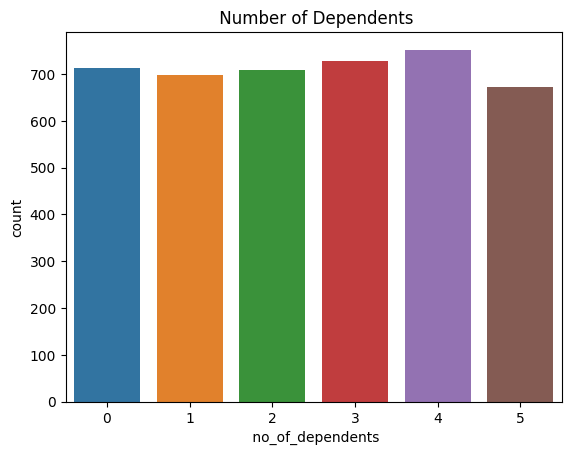

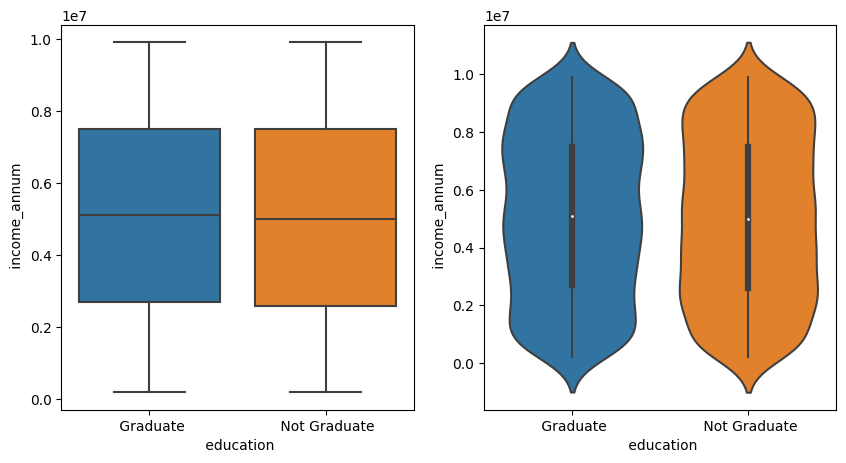

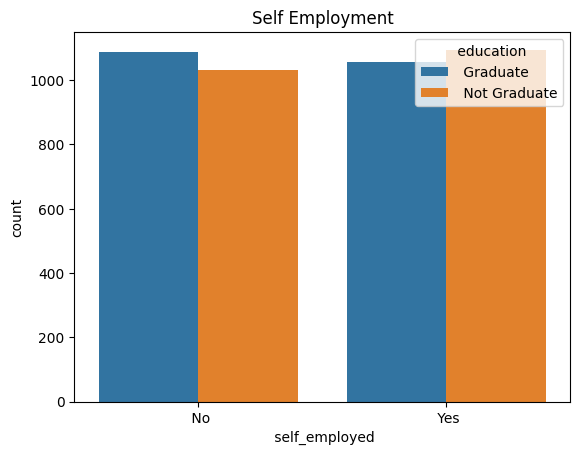

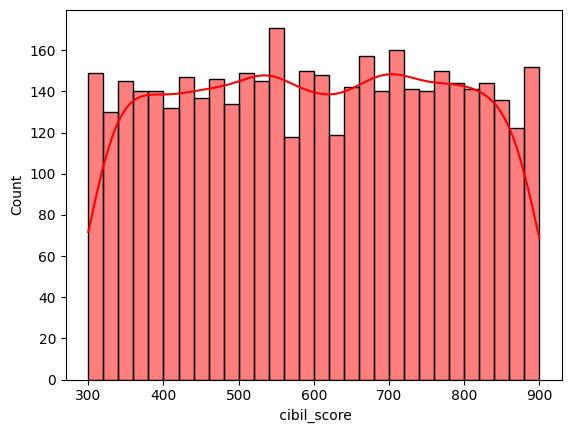

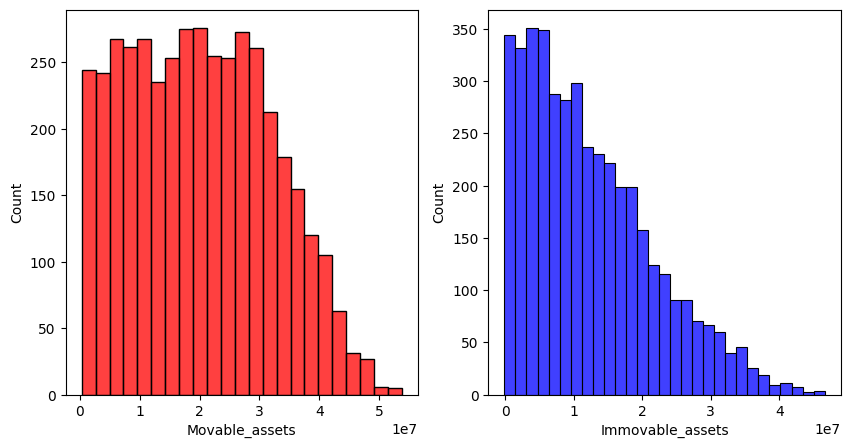

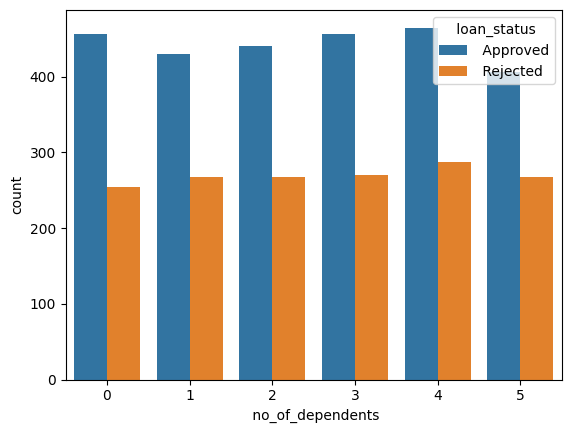

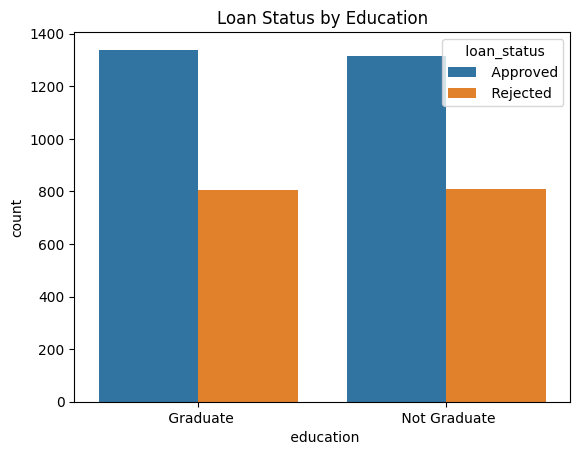

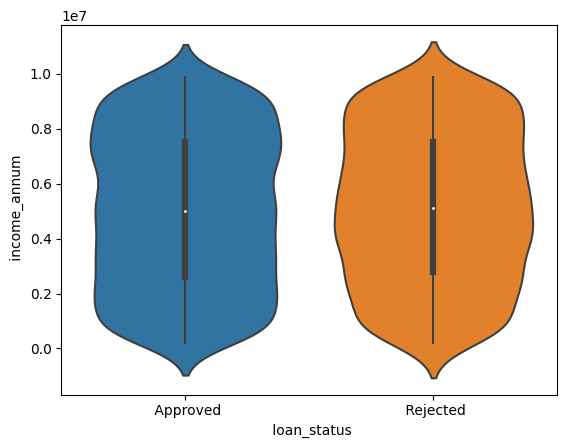

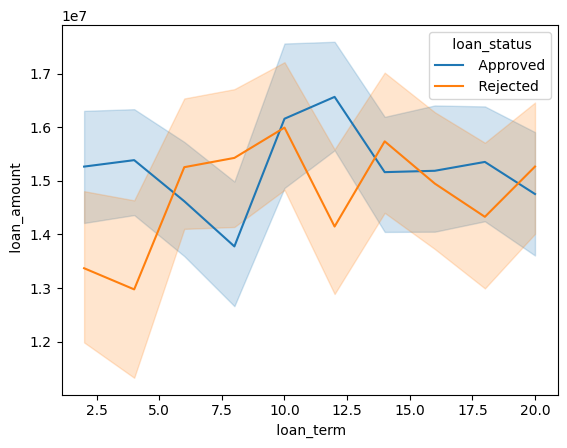

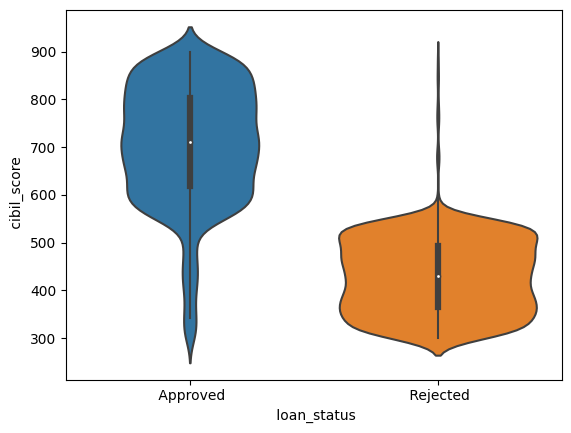

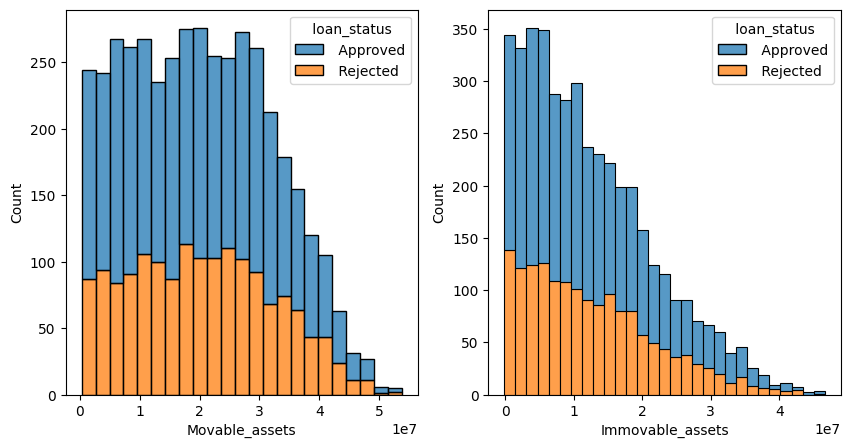

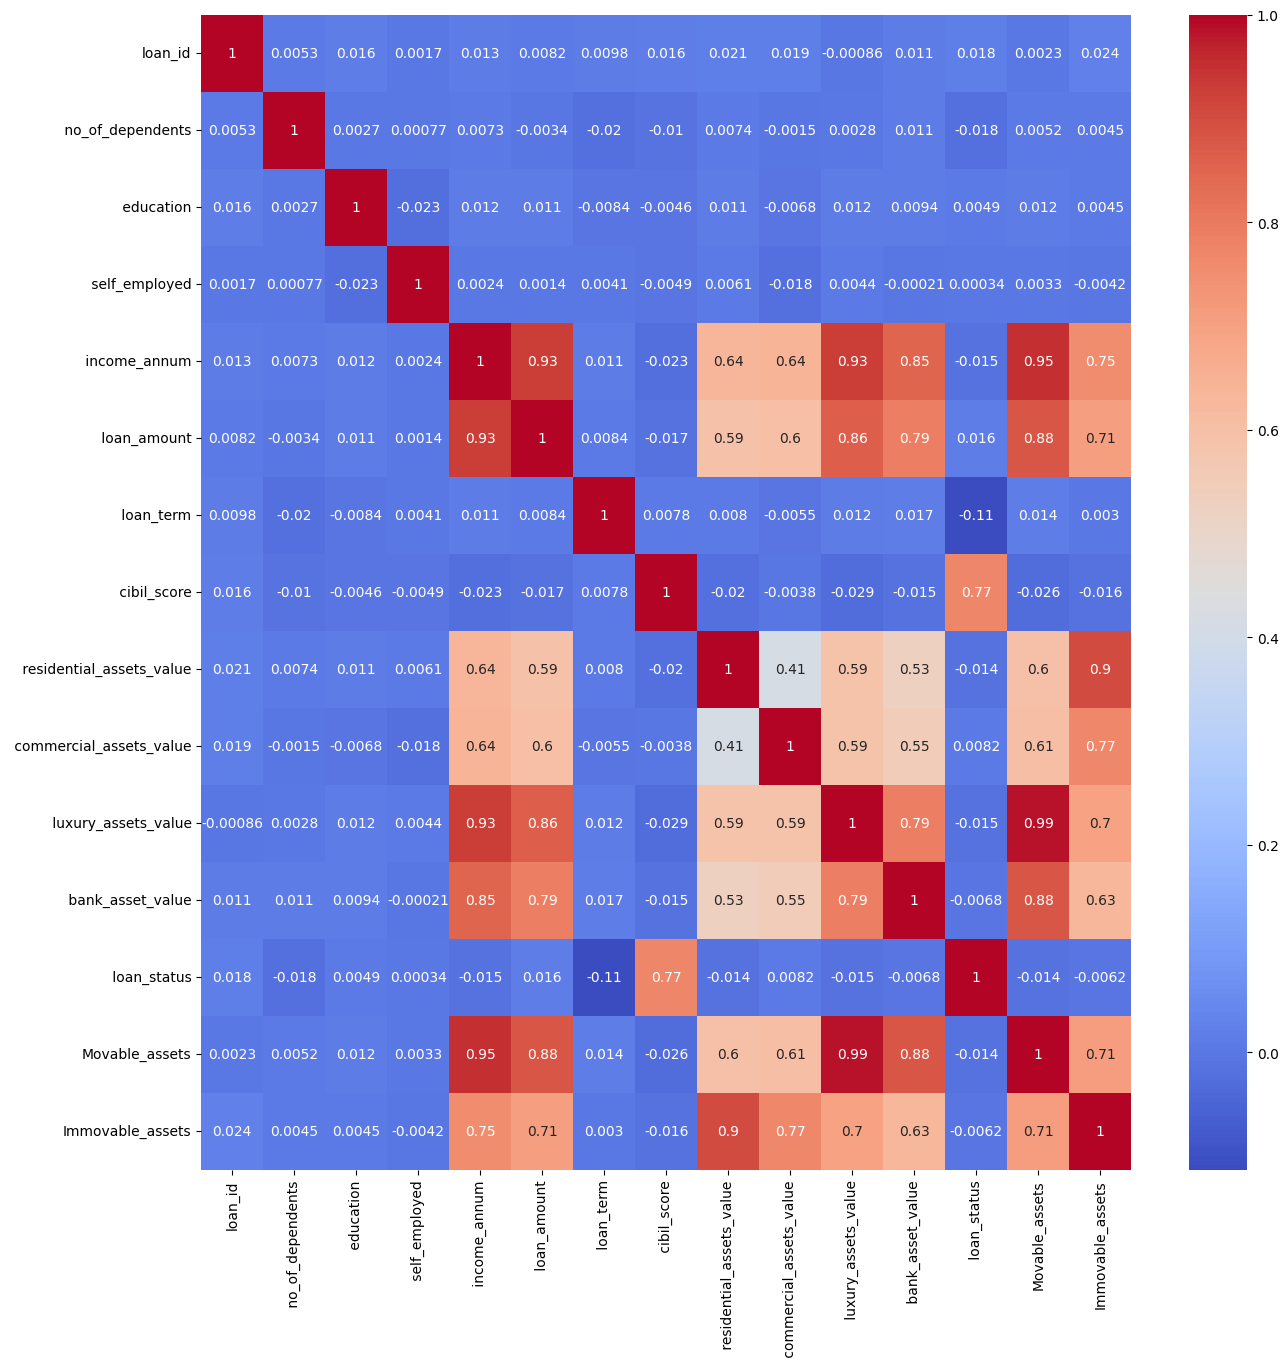

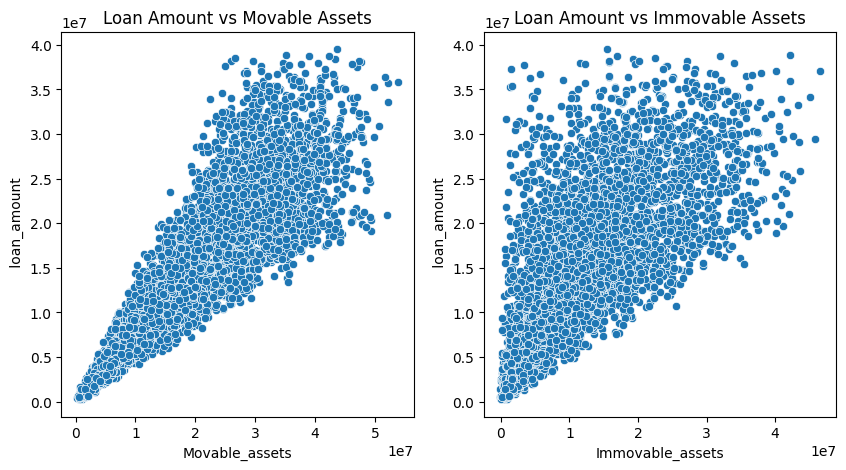

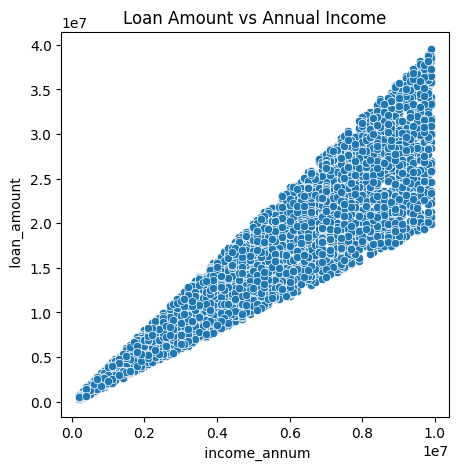

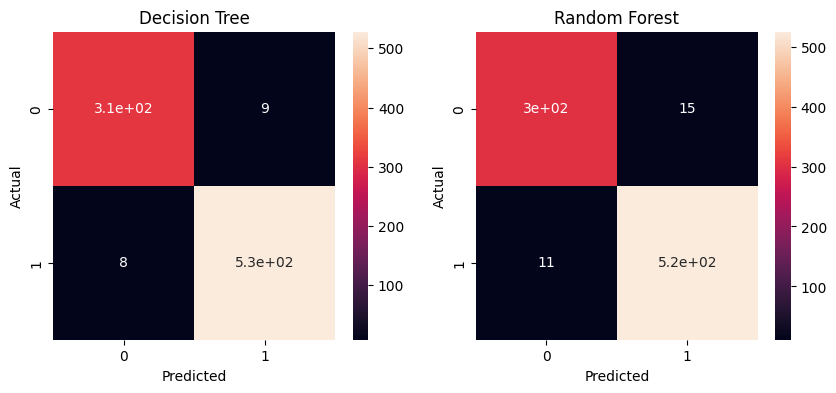

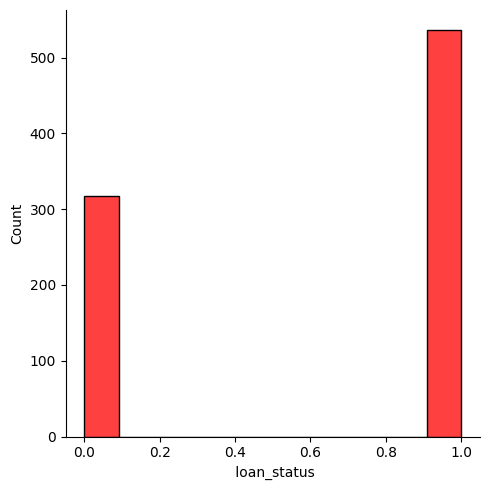

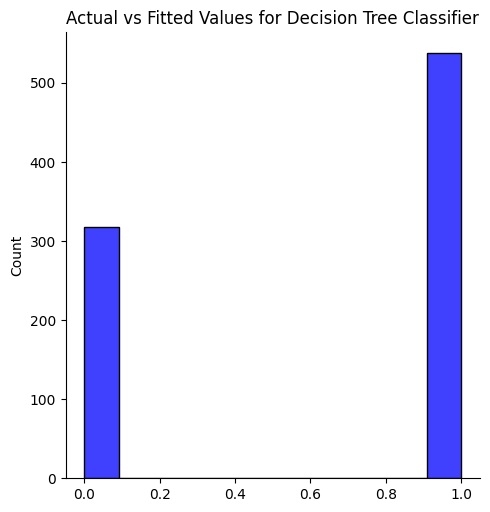

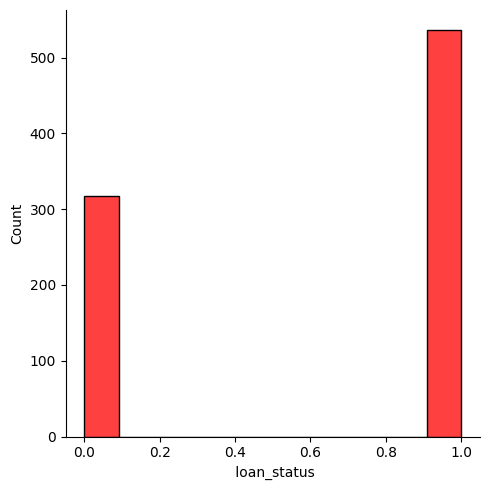

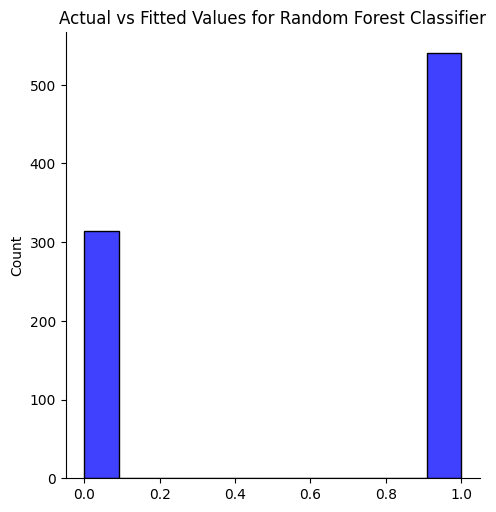

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as py
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

''' DATA INITIALIZATION '''

df = pd.read_csv('/content/drive/MyDrive/loan_approval_dataset.csv') #read file with pandas from drive
df.head() # print first few entries of dataset

# sorting assets into movable and immovable assets, making them their own variables, and droping their sub assets' columns
df['Movable_assets'] = df[' bank_asset_value'] + df[' luxury_assets_value']
df['Immovable_assets'] = df[' residential_assets_value'] + df[' commercial_assets_value']
df.drop(columns = [' bank_asset_value', ' luxury_assets_value', ' residential_assets_value', ' commercial_assets_value'])
df.describe()


''' DATA GRAPHING '''


# Number of Dependents
plt.figure()
sns.countplot(x = ' no_of_dependents', data = df).set_title(' Number of Dependents')

# Income vs Education
fig, ax = plt.subplots(1, 2, figsize= (10, 5))
sns.boxplot(x = ' education', y = ' income_annum', data = df, ax = ax[0])
sns.violinplot(x = ' education', y = ' income_annum', data = df, ax = ax[1]) # white dot = mean, bold black line = IQR, blob = data density, data fluctuation

# Education Level vs Self Employment
plt.figure()
sns.countplot(x = ' self_employed', data = df, hue = ' education').set_title('Self Employment')

# Cibil Score
plt.figure()
sns.histplot(df[' cibil_score'], bins = 30, kde = True, color = 'red')

# Movable Assets and Immovable Assets
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
sns.histplot(df['Movable_assets'], ax = ax[0], color = 'red')
sns.histplot(df['Immovable_assets'], ax = ax[1], color = 'blue')

# Loan Status vs # of Dependents
plt.figure()
sns.countplot(x = ' no_of_dependents', data = df, hue = ' loan_status')

# Loan Status vs Education
plt.figure()
sns.countplot(x = ' education', hue = ' loan_status', data = df).set_title('Loan Status by Education')

# Loan Status vs Annual Income
plt.figure()
sns.violinplot(x = ' loan_status', y = ' income_annum', data = df)

# Loan Status vs Loan Term and Amount
plt.figure()
sns.lineplot(x = ' loan_term', y = ' loan_amount', data = df, hue = ' loan_status')

# Cibil Score (credit score) vs Loan Status
plt.figure()
sns.violinplot(x = ' loan_status', y = ' cibil_score', data = df)

# Loan Status vs Movable and Immovable Assets
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
sns.histplot(x = 'Movable_assets', data = df, ax = ax[0], hue = ' loan_status', multiple = 'stack')
sns.histplot(x = 'Immovable_assets', data = df, ax = ax[1], hue = ' loan_status', multiple = 'stack')


''' MACHINE LEARNING BASICS '''


# label encoding
df[' education'] = df[' education'].map({' Not Graduate': 0, ' Graduate': 1})
df[' self_employed'] = df[' self_employed'].map({' No': 0, ' Yes': 1})
df[' loan_status'] = df[' loan_status'].map({' Rejected': 0, ' Approved': 1})
df.head()

# heat map of all data correlations
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')

# Loan Amount vs Movable and Immovable Assets
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
sns.scatterplot(x = 'Movable_assets', y = ' loan_amount', data = df, ax = ax[0]).set_title('Loan Amount vs Movable Assets')
sns.scatterplot(x = 'Immovable_assets', y = ' loan_amount', data = df, ax = ax[1]).set_title('Loan Amount vs Immovable Assets')

# Loan Amount vs Income
plt.figure(figsize = (5, 5))
sns.scatterplot(x=' income_annum', y = ' loan_amount', data = df).set_title('Loan Amount vs Annual Income')

# training set
X_train, X_test, y_train, y_test = train_test_split(df.drop( ' loan_status', axis = 1), df[' loan_status'], test_size = 0.2, random_state = 42)

# model building
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
dtree.score(X_train, y_train)
dtree_pred = dtree.predict(X_test)  # training accuracy

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc.score(X_train, y_train)
rfc_pred = rfc.predict(X_test)      # training accuracy

fig, ax = plt.subplots(1, 2, figsize = (10,4))
sns.heatmap(confusion_matrix(y_test, dtree_pred), annot = True, ax = ax[0]).set_title('Decision Tree')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')

sns.heatmap(confusion_matrix(y_test, rfc_pred), annot = True, ax = ax[1]).set_title('Random Forest')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')

# determining accuracy of the model
ax = sns.displot(x = y_test, kind = 'hist', color = "r", label = "Actual Value")  # actual values
sns.displot(x = dtree_pred, kind = 'hist', color = "b", label = "Fitted Values")  # decision tree classifier predictions
plt.title('Actual vs Fitted Values for Decision Tree Classifier')

ax = sns.displot(x = y_test, kind = 'hist', color = "r", label = "Actual Value")  # actual values
sns.displot(x = rfc_pred, kind = 'hist', color = "b", label = "Fitted Values")    # random forest classifier predictions
plt.title('Actual vs Fitted Values for Random Forest Classifier')

# report on how well it performed
print(classification_report(y_test, dtree_pred))
print(classification_report(y_test, rfc_pred))

print('R2 score: ', r2_score(y_test, dtree_pred))
print('Mean Squared Error: ', mean_squared_error(y_test, dtree_pred))
print('Mean Absolute Error: ', mean_absolute_error(y_test, dtree_pred))

print('R2 score: ', r2_score(y_test, rfc_pred))
print('Mean Squared Error: ', mean_squared_error(y_test, rfc_pred))
print('Mean Absolute Error: ', mean_absolute_error(y_test, rfc_pred))